### 1.Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

Bangalore 628
Mumbai 446
New Delhi 385


Text(0.5, 1.0, 'CityLocation Vs Fundings')

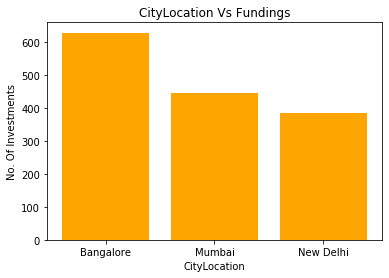

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

def removespace(str):
    a = int(str.index("/"))
    if str[a - 1] == " ":
        b = str.replace(str[a - 1],"")
    if str[a + 1] == " ":
        b = str.replace(str[a + 1],"")
    else :
        b = str
    return b


columns=["Date","StartupName","Industry/Vertical","SubVertical","CityLocation","InvestorsName","InvestmentType","AmountInUSD","Remarks"]
df=pd.read_csv("Desktop/Datasets/startup_funding.csv",names=columns)
df2=df.copy()
df2[df2["CityLocation"]=="Delhi"]="New Delhi"
df2[df2["CityLocation"]=="bangalore"]="Bangalore"
df2["CityLocation"].fillna("",inplace=True)
for i in range(len(df)):
    if df2["CityLocation"][i].find("/") != -1:
        df2["CityLocation"][i] = removespace(df2.CityLocation[i])
        
a = df2.CityLocation.value_counts()[0:3].index  #giving the city name 
b = df2.CityLocation.value_counts()[0:3].values #giving the number of funding rounds
#print(df2.CityLocation.value_counts() )

for i in range(len(a)):
    print(a[i],b[i])
    
plt.bar(a,b,color = "orange")

plt.xlabel("CityLocation")
plt.ylabel("No. Of Investments")
plt.title("CityLocation Vs Fundings")

###  2.Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


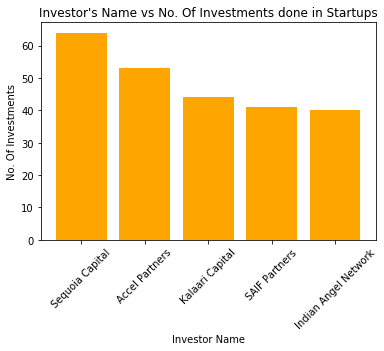

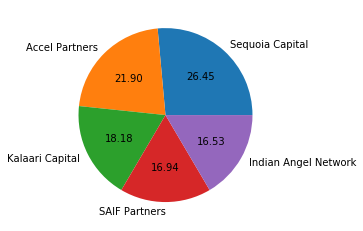

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("startup_funding.csv")

df.InvestorsName.fillna("",inplace= True)
#correcting names 
for i in range(len(df)):
    if df.StartupName[i].find("Flipkart") != -1:
        df.at[i, 'StartupName'] = "Flipkart"
    if df.StartupName[i].find("Ola") != -1:
        df.at[i, 'StartupName'] = "Ola" 
    if df.StartupName[i].find("Oyo") != -1:
        df.at[i, 'StartupName'] = "Oyo"
    if df.StartupName[i].find("OYO") != -1:
        df.at[i, 'StartupName'] = "Oyo" 
    if df.StartupName[i].find("Paytm") != -1:
        df.at[i, 'StartupName'] = "Paytm"
d = {} #dictionary to get the investorname and the count of investments 
for i in range(len(df)):
    if df.InvestorsName[i] != "":
        a = df.InvestorsName[i].split(",")
        for j in a:
            j = j.strip()
            if j in d:
                d[j] = d[j] + 1
            else:
                d[j] = 1
sorted_d=sorted_d = sorted(d.items(), key=lambda kv: kv[1],reverse = True)[:5] #will give the sorted list of tuples with name  
x1=[]                                                                          # at 0th position and count at 1st position of tuple
x2=[]
for i in sorted_d:
    print(i[0],i[1])
    x1.append(i[0]) #getting names 
    x2.append(i[1]) #getting counts 
#graph plot     
plt.bar(x1,x2,color = "Orange")

plt.xlabel("Investor Name")
plt.ylabel("No. Of Investments")
plt.title("Investor's Name vs No. Of Investments done in Startups")
plt.xticks(rotation = 45)
plt.show()
plt.pie(x2,labels = x1,autopct = "%.2f")
plt.show()

### 3.After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


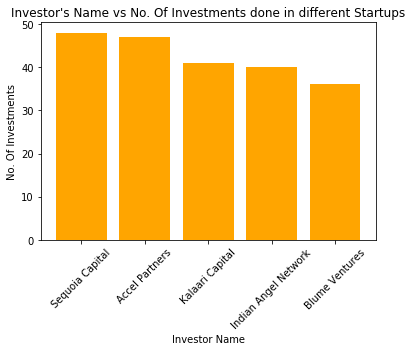

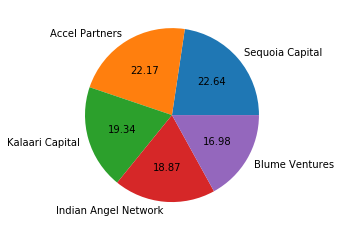

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("startup_funding.csv")

df.InvestorsName.fillna("",inplace= True)

for i in range(len(df)):
    if df.StartupName[i].find("Flipkart") != -1:
        df.at[i, 'StartupName'] = "Flipkart"
    if df.StartupName[i].find("Ola") != -1:
        df.at[i, 'StartupName'] = "Ola" 
    if df.StartupName[i].find("Oyo") != -1:
        df.at[i, 'StartupName'] = "Oyo"
    if df.StartupName[i].find("OYO") != -1:
        df.at[i, 'StartupName'] = "Oyo" 
    if df.StartupName[i].find("Paytm") != -1:
        df.at[i, 'StartupName'] = "Paytm"
d = {} #dictionary for counting no. of investment round as per the startup name and the investor name 
for i in range(len(df)):
    if df.InvestorsName[i] != "":
        a = df.InvestorsName[i].split(",")
        for j in a:
            j = j.strip()
            if (df.StartupName[i],j) in d:
                d[(df.StartupName[i],j)] = d[(df.StartupName[i],j)] + 1
            else:
                d[(df.StartupName[i],j)] = 1
            
x = [] #list of investors 
for i in d:
    x.append(i[1])
dic = {} # for finding investors without repetitive invesment done by the investor 
for i in x:
    if i in dic:
        dic[i] = dic[i] + 1
    else:
        dic[i] = 1
dic[""] = 0
x1 = []
x2 = []
sorted_d = sorted(dic.items(), key=lambda kv: kv[1],reverse = True) # sorted list in descending order 
for i in sorted_d[:5]:
    print(i[0],i[1])
    x1.append(i[0])
    x2.append(i[1])
#graph plot     
plt.bar(x1,x2,color = "orange")

plt.xlabel("Investor Name")
plt.ylabel("No. Of Investments")
plt.title("Investor's Name vs No. Of Investments done in different Startups")
plt.xticks(rotation = 45)
plt.show()
plt.pie(x2,labels = x1,autopct = "%.2f")
plt.show()

### 4. Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


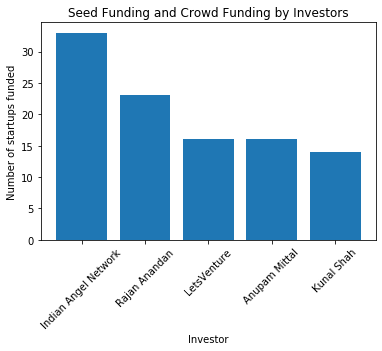

In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('startup_funding.csv')
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace = True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace = True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace = True)
df['AmountInUSD'].fillna('0',inplace = True) # nan handling of funding column

x = dict.fromkeys(['OYO Rooms', 'Oyo Rooms','OyoRooms','Oyorooms'], 'Oyo')
y = dict.fromkeys(['Ola Cabs','Olacabs'],'Ola')
df['StartupName']=df['StartupName'].replace(x)
df['StartupName']=df['StartupName'].replace(y)
df['StartupName']=df['StartupName'].replace({"Flipkart.com":"Flipkart"})
df['StartupName']=df['StartupName'].replace({'Paytm Marketplace':'Paytm'})
df['InvestorsName'].fillna('0',inplace = True) # unknown investor names replaced by '0'

d = {}
# d is a dictionary which uses investors as keys for which value is another dictionary with
# startup names as keys and number of investments made in that startup as value
# for ex 'Sequoia Capital': {'Ola':5, 'Flipkart':2} could be a key value pair in d (so Sequoia would have invested
# 5 times in Ola and twice in Flipkart)

for _,row in df.iterrows():
    x = row['InvestorsName'].strip().rstrip(',') # trailing comma caused ' ' to appear as investor name so it had to be removed
    itype = row['InvestmentType']
    if itype=='Seed Funding' or itype=='Crowd Funding':
        startup = row['StartupName'].strip()
        names = x.split(',')
        for name in names:
            if 'undisclosed' in name.lower(): #ignoring undisclosed investors
                break
            else:
                name = name.strip()
                if name in d:
                    if startup in d[name]:
                        d[name][startup]+=1
                    else:
                        d[name][startup]=1
                else:
                    d[name]={}
                    d[name][startup]=1


d2 = {} #counts number of startups an investor has invested in, as is required by question
# ex: 'Sequoia Capital': 2 could be a key value pair in d2 corresponding to example key-value pair in d 
# i.e. Sequoia Capital invested in 2 startups (ola and flipkart)

for investor in d:
    d2[investor] = len(d[investor])
    
d2 = sorted(d2.items(), key=lambda x: x[1], reverse=True)[:5] # d2 is now a list of tuples (investor, count) 
# sorted in descending order of count

investors = [t[0] for t in d2]
counts = [t[1] for t in d2]
for i in range(len(d2)):
    print(investors[i],counts[i])
    
plt.bar(investors,counts)
plt.xticks(rotation = 45, horizontalalignment = 'center')
plt.title('Seed Funding and Crowd Funding by Investors')
plt.xlabel('Investor')
plt.ylabel('Number of startups funded')
plt.show()

### 5. Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Sequoia Capital 45
Accel Partners 42
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


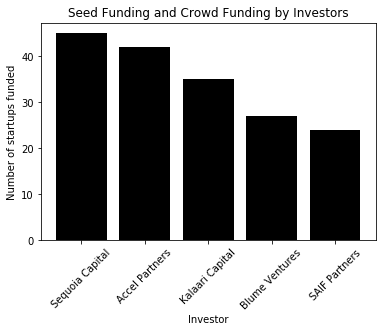

In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('startup_funding.csv')
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace = True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace = True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace = True)
df['AmountInUSD'].fillna('0',inplace = True) # nan handling of funding column

x = dict.fromkeys(['OYO Rooms', 'Oyo Rooms','OyoRooms','Oyorooms'], 'Oyo')
y = dict.fromkeys(['Ola Cabs','Olacabs'],'Ola')
df['StartupName']=df['StartupName'].replace(x)
df['StartupName']=df['StartupName'].replace(y)
df['StartupName']=df['StartupName'].replace({"Flipkart.com":"Flipkart"})
df['StartupName']=df['StartupName'].replace({'Paytm Marketplace':'Paytm'})
df['InvestorsName'].fillna('0',inplace = True) # unknown investor names replaced by '0'

d = {}
# d is a dictionary which uses investors as keys for which value is another dictionary with
# startup names as keys and number of investments made in that startup as value
# for ex 'Sequoia Capital': {'Ola':5, 'Flipkart':2} could be a key value pair in d (so Sequoia would have invested
# 5 times in Ola and twice in Flipkart)

for _,row in df.iterrows():
    x = row['InvestorsName'].strip().rstrip(',') # trailing comma caused ' ' to appear as investor name so it had to be removed
    itype = row['InvestmentType']
    if itype=='Private Equity':
        startup = row['StartupName'].strip()
        names = x.split(',')
        for name in names:
            if 'undisclosed' in name.lower(): #ignoring undisclosed investors
                break
            else:
                name = name.strip()
                if name in d:
                    if startup in d[name]:
                        d[name][startup]+=1
                    else:
                        d[name][startup]=1
                else:
                    d[name]={}
                    d[name][startup]=1


d2 = {} #counts number of startups an investor has invested in, as is required by question
# ex: 'Sequoia Capital': 2 could be a key value pair in d2 corresponding to example key-value pair in d 
# i.e. Sequoia Capital invested in 2 startups (ola and flipkart)

for investor in d:
    d2[investor] = len(d[investor])
    
d2 = sorted(d2.items(), key=lambda x: x[1], reverse=True)[:5] # d2 is now a list of tuples (investor, count) 
# sorted in descending order of count

investors = [t[0] for t in d2]
counts = [t[1] for t in d2]
for i in range(len(d2)):
    print(investors[i],counts[i])
    
plt.bar(investors,counts,color="black")
plt.xticks(rotation = 45, horizontalalignment = 'center')
plt.title('Seed Funding and Crowd Funding by Investors')
plt.xlabel('Investor')
plt.ylabel('Number of startups funded')
plt.show()